# Prueba RNN
## Predicción de una Serie de Tiempo Simple con RNN (LSTM) 
<p>Un ejemplo clásico y muy representativo de RNN para problemas de temporalidad es la predicción de series de tiempo. Vamos a usar un caso simple: predecir los siguientes valores de una secuencia numérica generada artificialmente.</p>
<p>Utilizaremos TensorFlow y Keras, que son librerías muy comunes para construir y entrenar modelos de Deep Learning. En este ejemplo, crearemos una serie de tiempo sinusoidal y entrenaremos una red LSTM (un tipo avanzado de RNN) para predecir el siguiente punto en la serie basándose en los puntos anteriores.</p>

In [1]:
# Impotaciones
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


2025-06-21 12:54:19.894303: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-21 12:54:19.974639: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-21 12:54:20.043673: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750528460.100582   24953 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750528460.119622   24953 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750528460.249372   24953 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

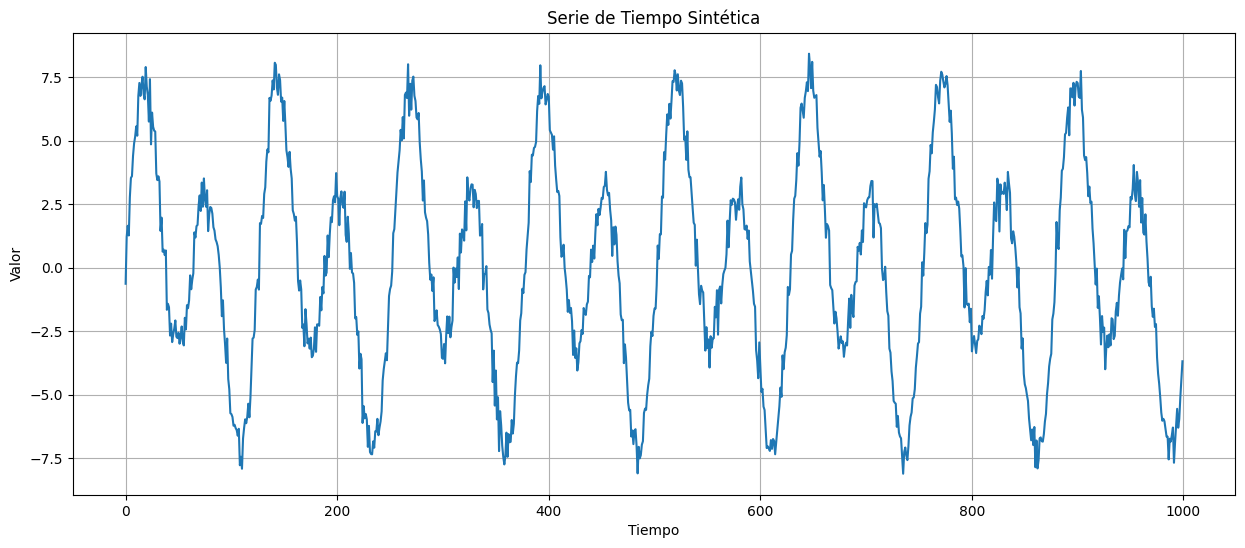

In [2]:
# 1. Generación de datos de series de tiempo sintéticos
# Vamos a crear una serie de tiempo simple, por ejemplo, una onda sinusoidal.

# Número total de puntos en la serie
total_points = 1000

# Generar puntos de tiempo
time = np.arange(total_points)

# Generar la serie sinusoidal con algo de ruido para mayor realismo
amplitude = np.sin(time / 10) * 5 + np.sin(time / 20) * 3
noise = np.random.normal(0, 0.5, total_points)
series = amplitude + noise

plt.figure(figsize=(15, 6))
plt.plot(time, series)
plt.title("Serie de Tiempo Sintética")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.grid(True)
plt.show()



In [3]:
# 2. Preparación de datos para la RNN (ventanas deslizantes)
# Para entrenar una RNN, necesitamos secuencias de entrada (ventana) y un valor de salida.
# Por ejemplo, si tenemos la secuencia [x1, x2, x3, x4, x5], podríamos querer
# usar [x1, x2, x3] para predecir x4, o [x1, x2, x3, x4] para predecir x5.

window_size = 50 # Cuántos puntos anteriores usaremos para predecir el siguiente

X = [] # Secuencias de entrada
y = [] # Valores de salida (lo que queremos predecir)

for i in range(len(series) - window_size):
    X.append(series[i : i + window_size])
    y.append(series[i + window_size])

X = np.array(X)
y = np.array(y)



In [4]:
# Las RNN en Keras esperan una entrada 3D: (muestras, pasos de tiempo, características)
# En nuestro caso, tenemos 1 característica (el valor de la serie).
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"Forma de X (entradas): {X.shape}") # (número de secuencias, tamaño de ventana, número de características)
print(f"Forma de y (salidas): {y.shape}")   # (número de secuencias,)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)} muestras")
print(f"Tamaño del conjunto de prueba: {len(X_test)} muestras")




Forma de X (entradas): (950, 50, 1)
Forma de y (salidas): (950,)
Tamaño del conjunto de entrenamiento: 760 muestras
Tamaño del conjunto de prueba: 190 muestras


2025-06-21 12:56:40.379381: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/usuaio/proyectos/MachineLearning/.venv/lib64/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando el modelo...
Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 11.4456 - val_loss: 4.1510
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4740 - val_loss: 3.7132
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.6990 - val_loss: 1.1482
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.1868 - val_loss: 0.6925
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5058 - val_loss: 0.3833
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7704 - val_loss: 0.3670
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8737 - val_loss: 0.3211
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5486 - val_loss: 0.2497
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3915 - val_loss: 0.2658
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3394 - val_loss: 0.2646
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3569 - val_loss: 0.2997
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━

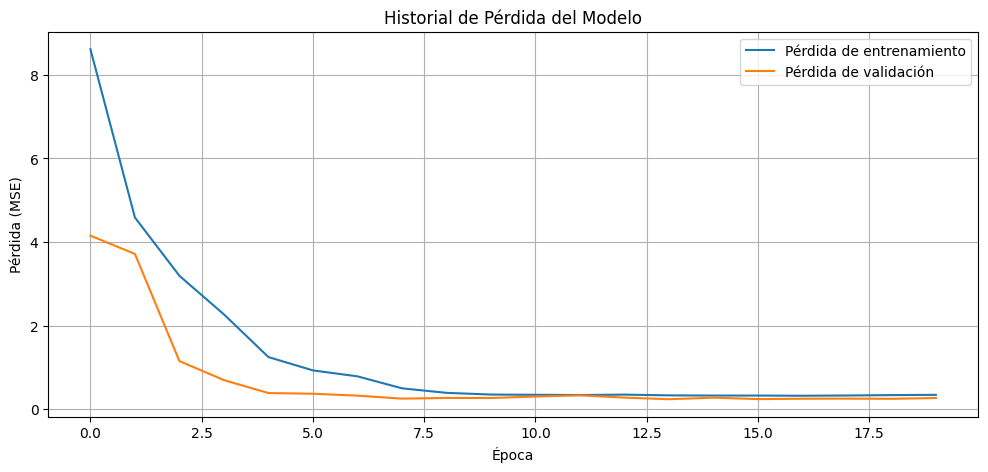

In [5]:
# 3. Construcción del modelo RNN (LSTM)
# Usaremos una capa LSTM, que es particularmente buena para capturar dependencias a largo plazo.

model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)), # 50 unidades LSTM, relu como activación
    Dense(1) # Una capa de salida densa con 1 neurona para predecir un único valor
])

# 4. Compilación del modelo
model.compile(optimizer='adam', loss='mse') # Adam es un optimizador popular, mse (Mean Squared Error) para regresión

model.summary()

# 5. Entrenamiento del modelo
print("\nEntrenando el modelo...")
history = model.fit(X_train, y_train,
                    epochs=20, # Número de pasadas sobre el conjunto de entrenamiento
                    batch_size=32, # Número de muestras por actualización de gradiente
                    validation_split=0.1, # 10% de los datos de entrenamiento para validación
                    verbose=1)

# 6. Visualización del historial de entrenamiento
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Historial de Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()




Evaluando el modelo en el conjunto de prueba...
Pérdida (MSE) en el conjunto de prueba: 0.3491
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


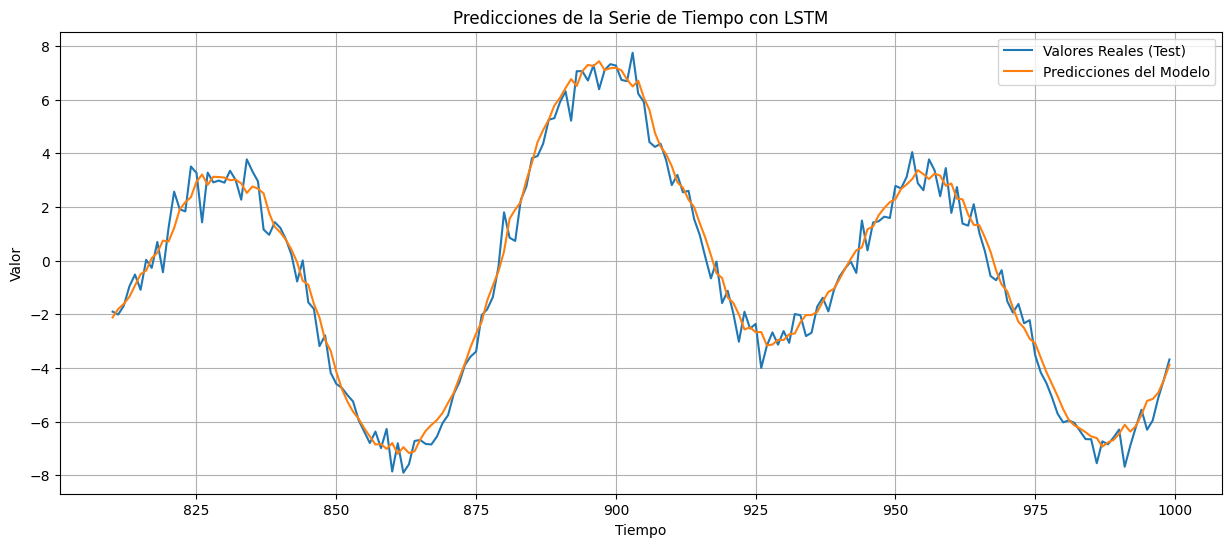

In [6]:
# 7. Evaluación del modelo en el conjunto de prueba
print("\nEvaluando el modelo en el conjunto de prueba...")
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida (MSE) en el conjunto de prueba: {loss:.4f}")

# 8. Realización de predicciones
predictions = model.predict(X_test)

# 9. Visualización de predicciones vs. valores reales
plt.figure(figsize=(15, 6))
plt.plot(time[train_size + window_size:], y_test, label='Valores Reales (Test)')
plt.plot(time[train_size + window_size:], predictions, label='Predicciones del Modelo')
plt.title("Predicciones de la Serie de Tiempo con LSTM")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()




Realizando predicciones futuras...


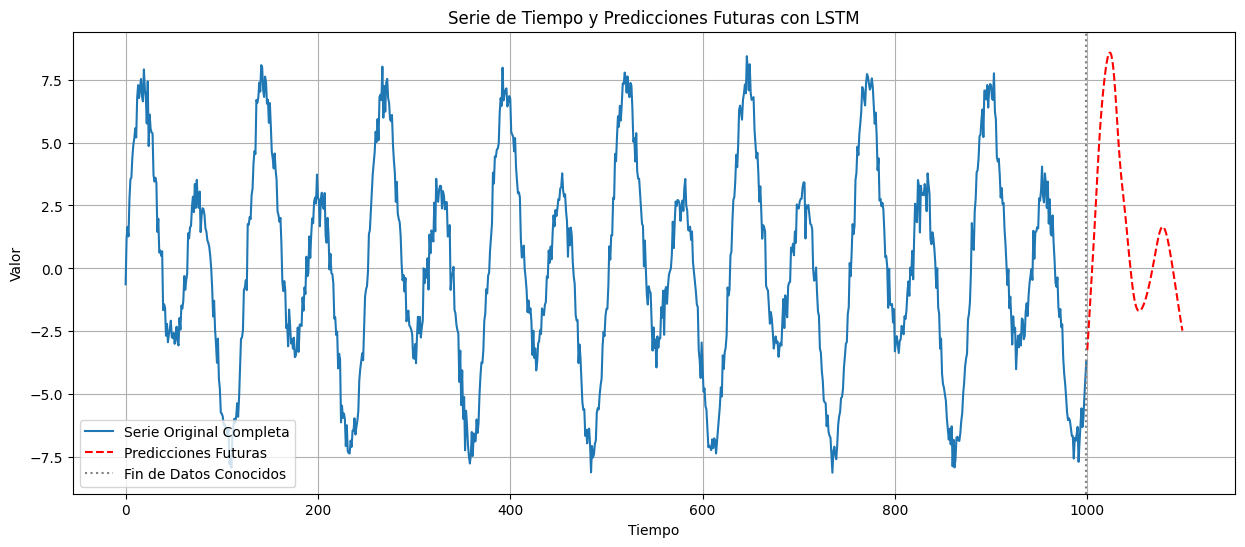

In [7]:
# Opcional: Predicción de los próximos N puntos después de la serie conocida
# Para hacer esto, necesitamos tomar los últimos 'window_size' puntos de la serie original
# y luego, iterativamente, predecir el siguiente punto y agregarlo a nuestra secuencia
# para predecir el siguiente y así sucesivamente.

def predict_future(model, initial_sequence, num_predictions):
    current_sequence = initial_sequence.copy()
    future_predictions = []

    for _ in range(num_predictions):
        # Reshape para que coincida con el input_shape del modelo (1, window_size, 1)
        input_for_prediction = current_sequence.reshape(1, -1, 1)
        predicted_value = model.predict(input_for_prediction, verbose=0)[0, 0]
        future_predictions.append(predicted_value)

        # Actualizar la secuencia para la siguiente predicción:
        # Eliminar el primer elemento y añadir la predicción al final
        current_sequence = np.append(current_sequence[1:], predicted_value)

    return np.array(future_predictions)

print("\nRealizando predicciones futuras...")
# Usamos la última ventana de la serie original como punto de partida
last_known_sequence = series[-window_size:]
num_future_points = 100
future_predictions = predict_future(model, last_known_sequence, num_future_points)

# Crear el eje de tiempo para las predicciones futuras
future_time = np.arange(total_points, total_points + num_future_points)

plt.figure(figsize=(15, 6))
plt.plot(time, series, label='Serie Original Completa')
plt.plot(future_time, future_predictions, label='Predicciones Futuras', linestyle='--', color='red')
plt.axvline(x=total_points-1, color='gray', linestyle=':', label='Fin de Datos Conocidos')
plt.title("Serie de Tiempo y Predicciones Futuras con LSTM")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()